<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2.3.1-载入各种数据科学与可视化库" data-toc-modified-id="2.3.1-载入各种数据科学与可视化库-1">2.3.1 载入各种数据科学与可视化库</a></span></li><li><span><a href="#2.3.2载入训练集和测试集" data-toc-modified-id="2.3.2载入训练集和测试集-2">2.3.2载入训练集和测试集</a></span></li><li><span><a href="#2.3.3-总览数据概况" data-toc-modified-id="2.3.3-总览数据概况-3">2.3.3 总览数据概况</a></span></li><li><span><a href="#2.3.4-判断数据缺失和异常" data-toc-modified-id="2.3.4-判断数据缺失和异常-4">2.3.4 判断数据缺失和异常</a></span></li><li><span><a href="#2.3.5-了解预测值的分布" data-toc-modified-id="2.3.5-了解预测值的分布-5">2.3.5 了解预测值的分布</a></span></li><li><span><a href="#2.3.7-用pandas_profiling-生成数据报告" data-toc-modified-id="2.3.7-用pandas_profiling-生成数据报告-6">2.3.7 用pandas_profiling 生成数据报告</a></span></li><li><span><a href="#总结" data-toc-modified-id="总结-7">总结</a></span></li></ul></div>

# 2.3.1 载入各种数据科学与可视化库

In [1]:
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')
import missingno as msno     # 缺失值可视化库
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import DataFrame,Series

# 2.3.2载入训练集和测试集
- 导入训练集train.csv 和测试集

In [3]:
Train_data = pd.read_csv('./train.csv')
Test_data  = pd.read_csv('./testA.csv')

In [11]:
# 观察收尾数据
Train_data.head().append(Train_data.tail())

,id,heartbeat_signals,label
0,0,"0.9912297987616655,0.9435330436439665,0.764677...",0.0
1,1,"0.9714822034884503,0.9289687459588268,0.572932...",0.0
2,2,"1.0,0.9591487564065292,0.7013782792997189,0.23...",2.0
3,3,"0.9757952826275774,0.9340884687738161,0.659636...",0.0
4,4,"0.0,0.055816398940721094,0.26129357194994196,0...",2.0
99995,99995,"1.0,0.677705342021188,0.22239242747868546,0.25...",0.0
99996,99996,"0.9268571578157265,0.9063471198026871,0.636993...",2.0
99997,99997,"0.9258351628306013,0.5873839035878395,0.633226...",3.0
99998,99998,"1.0,0.9947621698382489,0.8297017704865509,0.45...",2.0
99999,99999,"0.9259994004527861,0.916476635326053,0.4042900...",0.0


In [23]:
# 探索train首尾数据
Train_data.head().append(Train_data.tail())

,id,heartbeat_signals,label
0,0,"0.9912297987616655,0.9435330436439665,0.764677...",0.0
1,1,"0.9714822034884503,0.9289687459588268,0.572932...",0.0
2,2,"1.0,0.9591487564065292,0.7013782792997189,0.23...",2.0
3,3,"0.9757952826275774,0.9340884687738161,0.659636...",0.0
4,4,"0.0,0.055816398940721094,0.26129357194994196,0...",2.0
99995,99995,"1.0,0.677705342021188,0.22239242747868546,0.25...",0.0
99996,99996,"0.9268571578157265,0.9063471198026871,0.636993...",2.0
99997,99997,"0.9258351628306013,0.5873839035878395,0.633226...",3.0
99998,99998,"1.0,0.9947621698382489,0.8297017704865509,0.45...",2.0
99999,99999,"0.9259994004527861,0.916476635326053,0.4042900...",0.0


In [18]:
# train 数据集的行列数
Train_data.shape

(100000, 3)

In [20]:
# # testA 数据集的行列数
Test_data.shape

(20000, 2)

# 2.3.3 总览数据概况
- describe()---- 可以探索数据各个统计量
- info() ---  数据每列的type

In [24]:
# 获取train数据的相关统计量
Train_data.describe()

,id,label
count,100000.000000,100000.000000
mean,49999.500000,0.856960
std,28867.657797,1.217084
min,0.000000,0.000000
25%,24999.750000,0.000000
50%,49999.500000,0.000000
75%,74999.250000,2.000000
max,99999.000000,3.000000


In [25]:
# 获取train数据类型
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   heartbeat_signals  100000 non-null  object 
 2   label              100000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [26]:
# 获取testA数据的相关统计量
Test_data.describe()

,id
count,20000.000000
mean,109999.500000
std,5773.647028
min,100000.000000
25%,104999.750000
50%,109999.500000
75%,114999.250000
max,119999.000000


In [27]:
# 获取testA数据类型
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 20000 non-null  int64 
 1   heartbeat_signals  20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


# 2.3.4 判断数据缺失和异常

In [28]:
# 探索train查看缺失值情况
Train_data.isnull().sum()

id                   0
heartbeat_signals    0
label                0
dtype: int64

In [29]:
# 探索train查看缺失值情况
Test_data.isnull().sum()

id                   0
heartbeat_signals    0
dtype: int64

# 2.3.5 了解预测值的分布

In [30]:
Train_data['label']

0        0.0
1        0.0
2        2.0
3        0.0
4        2.0
        ... 
99995    0.0
99996    2.0
99997    3.0
99998    2.0
99999    0.0
Name: label, Length: 100000, dtype: float64

In [31]:
Train_data['label'].value_counts()

0.0    64327
3.0    17912
2.0    14199
1.0     3562
Name: label, dtype: int64

<AxesSubplot:title={'center':'Log Normal'}, xlabel='label'>

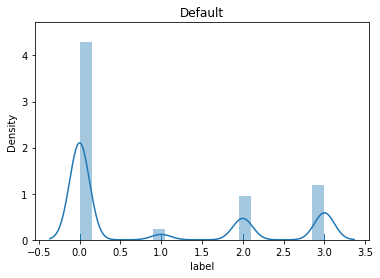

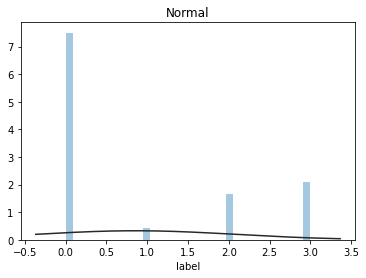

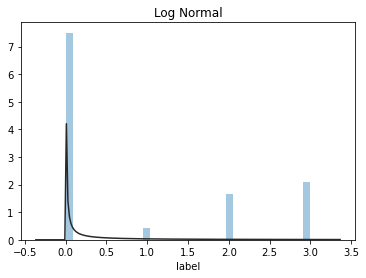

In [4]:
# 总体分布概况 (无界约翰逊分布等)
import scipy.stats as st
y = Train_data['label']
plt.figure(1); plt.title('Default')
sns.distplot(y, rug=True, bins=20)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Skewness : 0.871005
Kurtosis : -1.009573


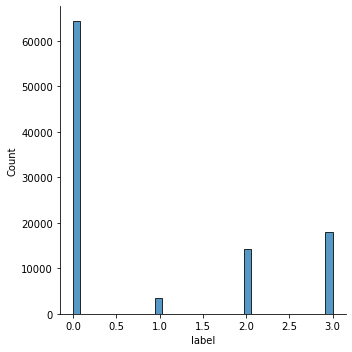

In [8]:
# 2) 查看skewness and kurtosis
sns.displot(Train_data['label']);
print("Skewness : %f" % Train_data['label'].skew())
print("Kurtosis : %f" % Train_data['label'].kurt())

In [9]:
Train_data.skew(), Train_data.kurt()

(id       0.000000
 label    0.871005
 dtype: float64,
 id      -1.200000
 label   -1.009573
 dtype: float64)

<AxesSubplot:xlabel='Kurtness', ylabel='Density'>

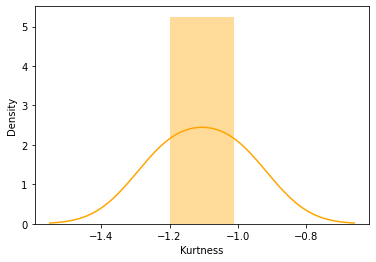

In [18]:
sns.distplot(Train_data.kurt(),color = 'orange',axlabel = 'Kurtness')

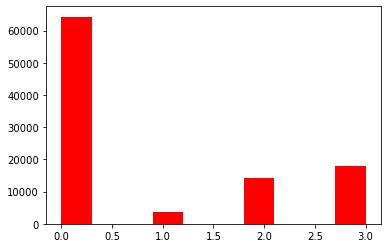

In [21]:
# 3) 查看预测值的具体频数
plt.hist(Train_data['label'],orientation = 'vertical',histtype = 'bar',color = 'red')
plt.show()

# 2.3.7 用pandas_profiling 生成数据报告

In [24]:
import pandas_profiling

In [28]:
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file('./example.html')

# 总结
- 贼强这个库pandas_profiling
- 数据探索非常重要！@！！ 查看有没有缺失值，曾经做相关性系数矩阵,因为一个数据的一个缺失值,到时debug了挺久,如果先data.isnull().sum()就没那么多😭了